In [1]:
import csv

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import matplotlib.cbook as cbook

In [5]:
BRANCH = 1
CITY = 2
CUSTOMER_TYPE = 3
GENDER = 4
PRODUCT_LINE = 5
UNIT_PRICE = 6
QUANTITY = 7
TAX5 = 8
TOTAL = 9
DATE = 10
TIME = 11
PAYMENT = 12
COGS = 13
GROSS_MARGIN_PERCENTAGE = 14
GROSS_INCOME = 15
RATING = 16
RETURN = 17

In [118]:
class Transactions():
    def __init__(self, file_location):
        """
        Initiatizes instance of class
        """
        self.file_location = file_location
    
    def load_from_file(self):
        """
        Loads dataset into a list using the csv library.
        """
        #open file from local directory
        open_file = open('/Users/lorenaalmaraz/Documents/Education & Learning/U of T/Course Materials/1 2020 Fall/INF1340 Programming/Assignments/Group Project 2/Group Project 2 Data.csv', mode = 'r')
        #use reader from the csv library to grab file data
        csv_raw_data = csv.reader(open_file)
        #assign data onto a list
        self.entities = list(csv_raw_data)[1:]
   
    def get_mean(self, item):
        """
        Precondition: item must be numerical.
        Takes an item and returns its average. Only works with numerical items.
        >>> get_mean(UNIT_PRICE)
        55.672129999999974
        >>> get_mean(PAYMENT)
        This function only works on numerical items.
        """
        #check if item is not one of the numerical ones
        if item != UNIT_PRICE and item != QUANTITY and item != TAX5 and item != TOTAL  and item != COGS and item != GROSS_MARGIN_PERCENTAGE and item != GROSS_INCOME and item != RATING and item != RETURN:
            print("NA") 
        else:
        #sum total divided by count
            sum_total = 0
            for row in self.entities:
                sum_total += float(row[item])

            return sum_total / len(self.entities)
        
    def get_median(self, item):
        """
        Precondition: item must be numerical.
        Takes an item and returns the median. Only works with numerical items.
        >>> get.median(TAX5)
        12.088000000000001
        >>> get_median(PAYMENT)
        This function only works on numerical items.
        """
        #check if item is not one of the numerical ones
        if item != UNIT_PRICE and item != QUANTITY and item != TAX5 and item != TOTAL and item != COGS and item != GROSS_MARGIN_PERCENTAGE and item != GROSS_INCOME and item != RATING and item != RETURN:
            print("NA") 
            return None
        
        #make list of all values as floats
        column_values = []
        for row in self.entities:
            column_values.append(float(row[item]))
        
        #if no values, no median
        if(len(column_values) == 0):
            return None
        #if only one value, that's the median
        elif (len(column_values) == 1):
            return column_values[0]
        else:
            column_values.sort()
            #if even number, sum the two in the middle and divide
            if(len(column_values)%2 == 0):
                return (column_values[len(column_values)//2]+column_values[len(column_values)//2-1])/2
            else:
                #if odd number, return the median
                return column_values[len(column_values)//2]
        
    def get_minimum(self, item):
        """
        Precondition: item must be numerical.
        Takes an item and returns its minimum value. Only works with numerical items.
        >>> get_minimum(QUANTITY)
        1.0
        """
        #check if item is not one of the numerical ones
        if item != UNIT_PRICE and item != QUANTITY and item != TAX5 and item != TOTAL and item != COGS and item != GROSS_MARGIN_PERCENTAGE and item != GROSS_INCOME and item != RATING and item != RETURN:
            print("NA") 
            return None
        #compare current min value to all values from item, replace min value if any other is less, all as floats
        #initial min value is value at index 0 from item
        min_value = float(self.entities[0][item])
        for row in self.entities:
            if float(row[item]) < min_value:
                min_value = float(row[item])
        return min_value
        
    def get_maximum(self, item):
        """
        Precondition: item must be numerical.        
        Takes an item and returns its maximum value. Only works with numerical items.
        >>> get_maximum(COGS)
        993.0
        """
        #check if item is not one of the numerical ones
        if item != UNIT_PRICE and item != QUANTITY and item != TAX5 and item != TOTAL and item != COGS and item != GROSS_MARGIN_PERCENTAGE and item != GROSS_INCOME and item != RATING and item != RETURN:
            print("NA") 
            return None
        #collect all values from item into list as floats, return max
        column_values = []
        for row in self.entities:
            column_values.append(float(row[item]))
        return max(column_values)
        
    def get_mode(self, item):
        """        
        Takes an item and returns its mode.
        >>> get_mode(TIME)
        ['19:48', '14:42']
        """
        max_count = 0
        most_freq = []
        item_dict = {}
        
        #iterate over dataset and add a count to items already as keys in dictionary
        for row in self.entities:
            key = row[item]
            if key in item_dict:
                item_dict[key] = item_dict[key] + 1
            else:
                #if item not in dictionary, include as key and add a count
                item_dict[key] = 1
        
        #iterate over keys and count in dictionary, return key with highest count
        for key, freq in item_dict.items():
            if freq > max_count:
                max_count = freq
                most_freq = [key]
            #provide multiple modes if applicable
            elif freq == max_count:
                most_freq.append(key)
        return most_freq
        
    def get_city_name_highest_gross_income(self, gender = 'all'):
        """
        Returns the name of the city with the highest gross income.
        If a gender is specified, it returns the city with the highest gross income for that gender specifically.
        Not case sensitive for gender argument.
        >>> get_city_name_highest_gross_income('WoMaN')
        'Naypyitaw'
        """
        highest_income = 0
        rich_city = ""
        cities_and_incomes = {}
        #case insensitive
        gender = gender.lower()
        
        #iterate over dataset, filter for gender if specified or default to all
        for row in self.entities:
            if gender == row[GENDER].lower() or gender == 'all':
                key = row[CITY]
                #if city already in dictionary as key, add gross income as float
                if key in cities_and_incomes:
                    cities_and_incomes[key] = cities_and_incomes[key] + float(row[GROSS_INCOME])
                else:
                    #if not in dictionary, add city as key with gross income as float as its value
                    cities_and_incomes[key] = float(row[GROSS_INCOME])
        
        #iterate over keys and values in dictionary, return key with highest value
        for key, total in cities_and_incomes.items():
            if total > highest_income:
                highest_income = total
                rich_city = key
        return rich_city

    def get_branch_name_lowest_gross_income(self, gender = 'all'):
        """
        Returns the letter of the branch with the lowest gross income.
        If a gender is specified, it returns the branch with the lowest gross income for that gender specifically.
        Not case sensitive for gender argument.
        >>> get_branch_name_lowest_gross_income()
        'B'
        """
        branches_and_incomes = {}
        #case insensitive
        gender = gender.lower()
        
        #iterate over dataset, filter for gender if specified or default to all        
        for row in self.entities:
            if gender == row[GENDER].lower() or gender == 'all':
                key = row[BRANCH]
                #if branch already in dictionary as key, add gross income as float                
                if key in branches_and_incomes:
                    branches_and_incomes[key] = branches_and_incomes[key] + float(row[GROSS_INCOME])
                else:
                    #if not in dictionary, add branch as key with gross income as float as its value                    
                    branches_and_incomes[key] = float(row[GROSS_INCOME])
                    
        #find key with lowest value        
        min_gross_income = min(branches_and_incomes, key=branches_and_incomes.get)
        
        return min_gross_income
        
    def get_most_popular_product_line(self, gender = 'all'):
        """
        Returns the name of the most popular product line.
        If a gender is specified, it returns the most popular product line for that gender specifically.
        Not case sensitive for gender argument.
        >>> get_most_popular_product_line()
        ['Fashion accessories']
        """
        max_count = 0
        most_popular = []
        product_lines = {}
        #case insensitive        
        gender = gender.lower()
        
        #iterate over dataset, filter for gender if specified or default to all    
        for row in self.entities:
            if gender == row[GENDER].lower() or gender == 'all':
                key = row[PRODUCT_LINE]
                #if product line already in dictionary as key, add a count
                if key in product_lines:
                    product_lines[key] = product_lines[key] + 1
                else:
                    #if product line not in dictionary, include as key and add a count
                    product_lines[key] = 1

        #iterate over keys and count in dictionary, return key with highest count        
        for key, freq in product_lines.items():
            if freq > max_count:
                max_count = freq
                most_popular = [key]
            elif freq == max_count:
                most_popular.append(key)
        return most_popular
        
    def get_most_popular_payment_type(self, gender = 'all'):
        """
        Returns the name of the most popular payment type.
        If a gender is specified, it returns the most popular payment type for that gender specifically.
        Not case sensitive for gender argument.
        >>> get_most_popular_payment_type('man')
        ['Ewallet']
        """
        max_count = 0
        most_popular = []
        payment_types = {}
        #case insensitive
        gender = gender.lower()

        #iterate over dataset, filter for gender if specified or default to all         
        for row in self.entities:
            if gender == row[GENDER].lower() or gender == 'all':
                key = row[PAYMENT]
                #if payment type already in dictionary as key, add a count
                if key in payment_types:
                    payment_types[key] = payment_types[key] + 1
                else:
                    #if payment type not in dictionary, include as key and add a count
                    payment_types[key] = 1
                    
        #iterate over keys and count in dictionary, return key with highest count 
        for key, freq in payment_types.items():
            if freq > max_count:
                max_count = freq
                most_popular = [key]
            elif freq == max_count:
                most_popular.append(key)
        return most_popular
    
    def get_statistics(self, item, gender = 'all'):
        """
        Takes an item and returns a tuple of its basic statistics: mean, median, min, max, and mode.
        Mean, median, min and max only work for numerical items.
        
        This function was previously called get_rating_statistics.
        The 'rating' was removed for accuracy as it works on all items, not just RATING.
        
        >>> get_statistics(UNIT_PRICE)
        (55.672129999999974, 55.230000000000004, 10.08, 99.96, ['83.77'])
        """
        #couldn't figure out was how to add the gender filtering
        #our only solution was to go back to each of the get_mean, get_median, etc
        #and add the gender filtering there, but that would mean adding a parameter for gender
        #to those as well and not sure that's correct
        
        mode = self.get_mode(item)

        #check if item is not one of the numerical ones and if it isn't, only return mode
        if item != UNIT_PRICE and item != QUANTITY and item != TAX5 and item != TOTAL and item != COGS and item != GROSS_MARGIN_PERCENTAGE and item != GROSS_INCOME and item != RATING and item != RETURN:
            print("Mean, median, minimum and maximum only work on numerical items.") 
            return mode
        else:
            #use previously defined methods otherwise and return as tuple
            mean = self.get_mean(item)
            median = self.get_median(item)
            minimum = self.get_minimum(item)
            maximum = self.get_maximum(item)

            return mean, median, minimum, maximum, mode

    def draw_boxplots_rating_return(self):
        """
        Draws two box plots, one shows ratings received to units returned,
        and the second shows ratings for units not returned.
        """
        returned = []
        not_returned = []
        ratings_and_returns = [not_returned, returned]
        
        #iterate over dataset and filter items as returned or not returned with their equivalent ratings as floats
        for row in self.entities:
            if row[RETURN] == '1':
                returned.append(float(row[RATING]))
            else:
                not_returned.append(float(row[RATING]))
        
        #this code came from matplotlib.org
        fig, ax = plt.subplots()
        pos = np.arange(len(ratings_and_returns)) + 1
        bp = ax.boxplot(ratings_and_returns, sym='k+', positions=pos)

        ax.set_xlabel('return')
        ax.set_ylabel('rating')
        ax.set_xticklabels(['not returned', 'returned'])
        plt.setp(bp['whiskers'], color='k', linestyle='-')
        plt.setp(bp['fliers'], markersize=3.0)
        plt.show()
        
        # Discussion:
        # From the boxplot we can see that units that were not returned
        # tend to be reviewed on a broader spectrum,
        # with the max above 9 and median around 4.
        # Units that were returned are rated significantly lower, 
        # with the max barely around 4 and median around 3.
        # From the graph it looks like that there is a correlation
        # between item ratings and returns the higher the rating value
        # the lower number of return. hence the regression model will show 
        # negative reation between ratings and return.
        
    
    def draw_rating_change(self):
        """
        Draws a scatterplot of ratings over time.
        """
        
        ratings = []
        dates = []
        
        #iterate over dataset and append ratings as floats to list
        for row in self.entities:
            ratings.append(float(row[RATING]))
            #iterate over dataset and append dates to list
            dates.append(row[DATE])
            
        N = len(ratings)
        x = dates
        y = ratings
        
        #this code came from matplotlib.org, except the stars but i like the stars
        fig, ax = plt.subplots()
        ax.plot(x, y, '*', color='tab:green')
        
        # Dicussion:
        # The figure shows that ratings decrease as time progresses.
    
    def draw_stacked_bar_total_sale_gender(self):
        """
        Draws stacked barplots for branch sales separated by gender.
        """
        
        branch_sales_by_gender = {}
        
        #iterate over dataset and add branches to dictionary with a list of two values for running totals
        for row in self.entities:
            key = row[BRANCH]
            if key not in branch_sales_by_gender:
                branch_sales_by_gender[key] = [0,0]
            gender = row[GENDER].lower()
            #case insensitive for good measure
            
            #add total to running total at index 0 in the list equivalent to each branch
            if gender == 'man':
                branch_sales_by_gender[key][0] += float(row[TOTAL])
            else:
                #running total for else at index 1 in the list for each branch
                branch_sales_by_gender[key][1] += float(row[TOTAL])
            
        labels = branch_sales_by_gender.keys()
        men_sales = []
        women_sales = []
        
        #iterate over dictionary keys and values and append the running totals for men at index 0 of the list,
        #and for women at index 1
        for key, value in branch_sales_by_gender.items():
            men_sales.append(value[0])
            women_sales.append(value[1])

        width = 0.15
        
        #this code came from matplotlib.org
        fig, ax = plt.subplots()

        ax.bar(labels, men_sales, width, label='Men')
        ax.bar(labels, women_sales, width, bottom=men_sales,
               label='Women')

        ax.set_ylabel('Total sales')
        ax.set_title('Branch sale totals by gender')
        ax.legend()

        plt.show()
        
        # Discussion:
        # From the diagram, we can see that the difference between sale totals per branch is not
        # particularly significant. The sales by gender, similarly, do not seems to differ significantly.

In [119]:
transaction_1 = Transactions("file_location")

In [120]:
transaction_1.load_from_file()

In [121]:
transaction_1.get_mean(UNIT_PRICE)

55.672129999999974

In [122]:
transaction_1.get_mean(PAYMENT)

NA


In [123]:
transaction_1.get_median(PAYMENT)

NA


In [124]:
transaction_1.get_median(TAX5)

12.088000000000001

In [125]:
transaction_1.get_minimum(QUANTITY)

1.0

In [126]:
transaction_1.get_minimum(CITY)

NA


In [127]:
transaction_1.get_maximum(TIME)

NA


In [128]:
transaction_1.get_maximum(COGS)

993.0

In [129]:
transaction_1.get_mode(CITY)

['Yangon']

In [130]:
transaction_1.get_mode(TIME)

['19:48', '14:42']

In [131]:
transaction_1.get_city_name_highest_gross_income('WoMaN')

'Naypyitaw'

In [132]:
transaction_1.get_branch_name_lowest_gross_income()

'B'

In [133]:
transaction_1.get_most_popular_product_line()

['Fashion accessories']

In [134]:
transaction_1.get_most_popular_payment_type('man')

['Ewallet']

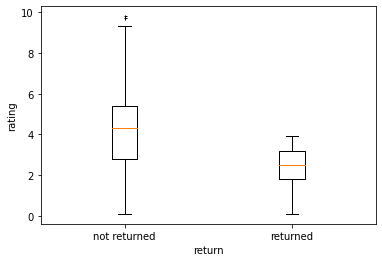

In [135]:
transaction_1.draw_boxplots_rating_return()

In [136]:
transaction_1.get_statistics(UNIT_PRICE)

(55.672129999999974, 55.230000000000004, 10.08, 99.96, ['83.77'])

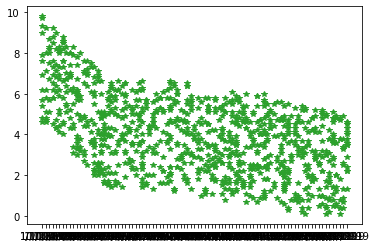

In [137]:
transaction_1.draw_rating_change()

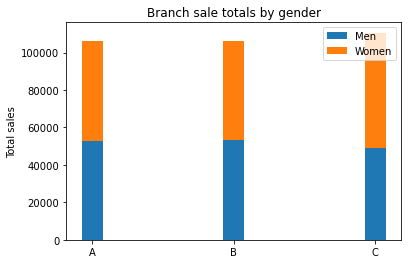

In [138]:
transaction_1.draw_stacked_bar_total_sale_gender()

In [139]:
transaction_1.get_mode(UNIT_PRICE)

['83.77']

In [140]:
transaction_1.get_city_name_highest_gross_income()

'Naypyitaw'

In [141]:
transaction_1.get_city_name_highest_gross_income("woman")

'Naypyitaw'

In [142]:
transaction_1.get_city_name_highest_gross_income("man")

'Mandalay'